<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="left">

# Assignment 1
## Arnaud Guzman-Annès

### Date: January 15th, 2021


**Objective:**

Pick a use case and a dataset and adapt the notebook shared below to this new dataset/use case.

https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb


# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

### About the dataset
* state: string. 2-letter code of the US state of customer residence
* account_length: numerical. Number of months the customer has been with the current telco provider
* area_code: string="area_code_AAA" where AAA = 3 digit area code.
* international_plan: (yes/no). The customer has international plan.
* voice_mail_plan: (yes/no). The customer has voice mail plan.
* number_vmail_messages: numerical. Number of voice-mail messages.
* total_day_minutes: numerical. Total minutes of day calls.
* total_day_calls: numerical. Total number of day calls.
* total_day_charg: numerical. Total charge of day calls.
* total_eve_minutes: numerical. Total minutes of evening calls.
* total_eve_calls: numerical. Total number of evening calls.
* total_eve_charge: numerical. Total charge of evening calls.
* total_night_minutes: numerical. Total minutes of night calls.
* total_night_calls: numerical. Total number of night calls.
* total_night_charge: numerical. Total charge of night calls.
* total_intl_minutes: numerical. Total minutes of international calls.
* total_intl_calls: numerical. Total number of international calls.
* total_intl_charge: numerical. Total charge of international calls
* number_customer_service_calls: numerical. Number of calls to customer service
* churn: (yes/no) Customer churn - target variable.

In [3]:
import pandas as pd
import requests
import io
    
# Downloading the csv file from my GitHub account
url = "https://raw.githubusercontent.com/arguz95/Churn/main/datasets/churn.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
# We will use "churn" instead of "df" for replication purposes
churn = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
churn["churn"].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

Text(0, 0.5, 'Number of customers')

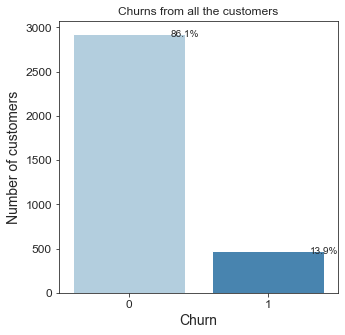

In [116]:
# Print figure

plt.figure(figsize=(5,5))
splot = sns.countplot(data = churn,x = 'churn',palette = 'Blues')
sns.set_style('ticks')
total = float(len(churn))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage, (x,y), ha = 'center', va = 'center')
plt.title("Churns from all the customers")
plt.xlabel("Churn")
plt.ylabel("Number of customers")

**There is 6 times more No observation than Yes. We are thus facing a case of data imbalance. We will tackle this problem later on the model selection section.**

In [6]:
churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Saving figure attribute_histogram_plots


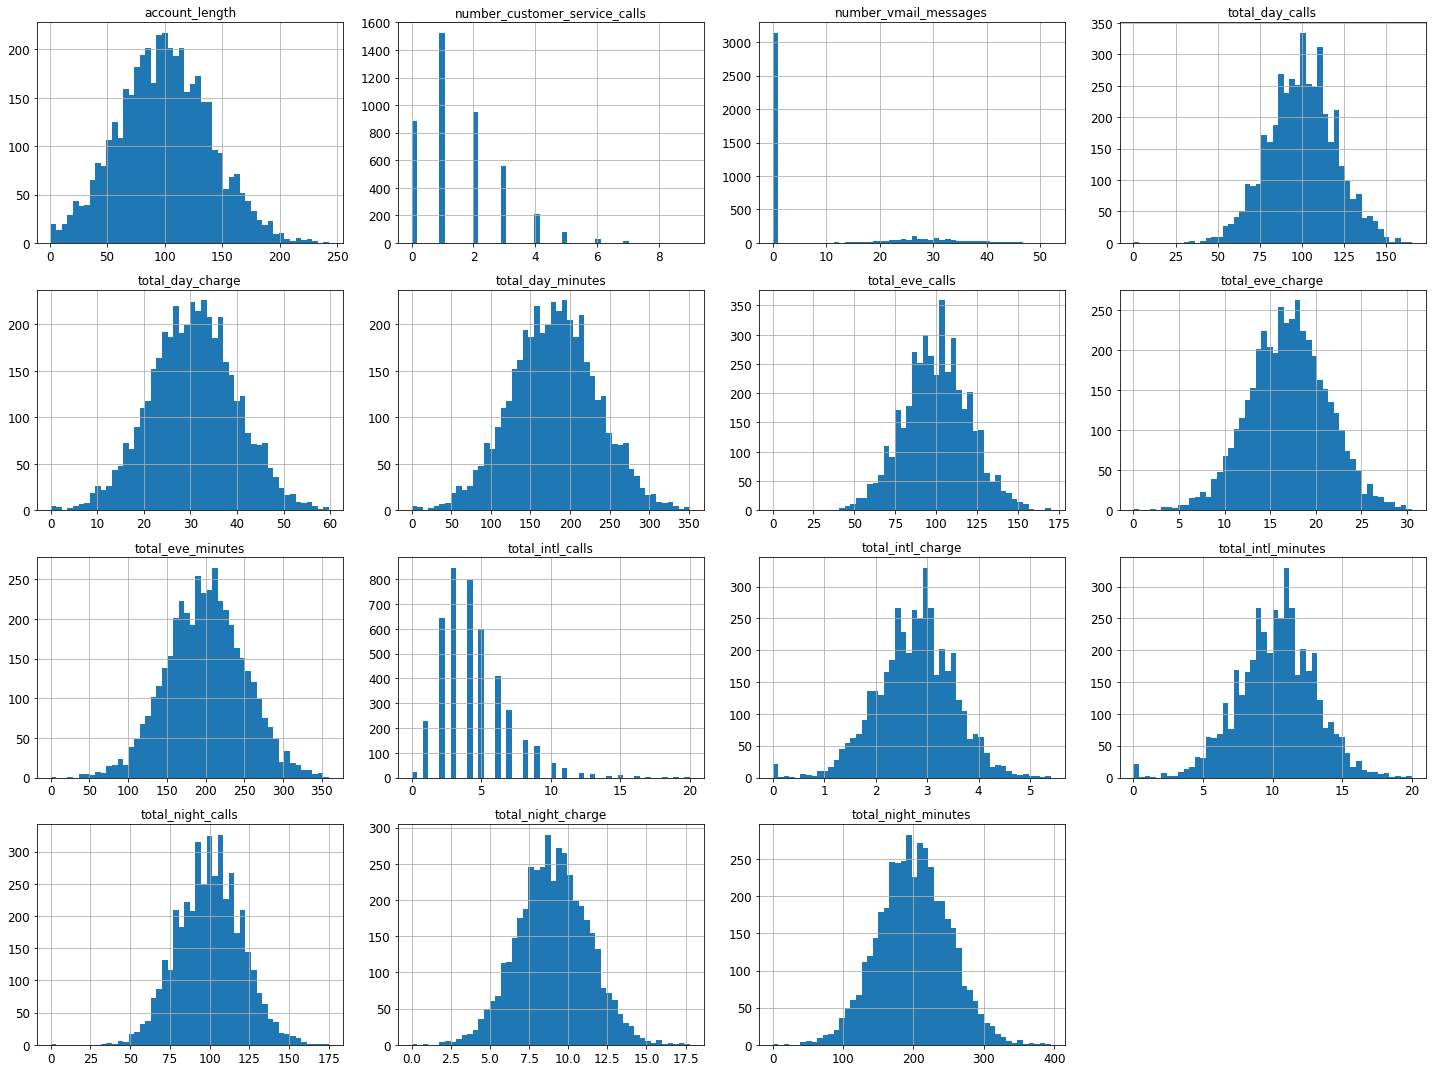

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
churn.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [8]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [9]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(churn, 0.2)
len(train_set)

3400

In [11]:
len(test_set)

850

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [14]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [15]:
churn_with_id = churn.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(churn_with_id, 0.2, "index")

In [16]:
test_set.head()

,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4,4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
11,11,MT,95,area_code_510,no,no,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,no
20,20,VA,132,area_code_510,no,no,0,81.1,86,13.79,...,72,20.84,237.0,115,10.67,10.3,2,2.78,0,no
23,23,MO,20,area_code_415,no,no,0,190.0,109,32.30,...,84,21.95,181.5,102,8.17,6.3,6,1.70,0,no


In [17]:
# Using the sklearn function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(churn, test_size=0.2, random_state=42)

In [18]:
test_set.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1024,KS,36,area_code_510,no,no,0,178.6,83,30.36,213.1,103,18.11,198.0,119,8.91,10.9,5,2.94,1,no
2177,MT,16,area_code_510,no,no,0,153.2,65,26.04,229.7,90,19.52,148.2,94,6.67,10.7,8,2.89,1,no
1444,NE,99,area_code_415,no,no,0,200.0,66,34.00,107.9,104,9.17,233.7,82,10.52,11.4,2,3.08,3,no
3386,OH,159,area_code_510,no,no,0,168.5,80,28.65,203.9,119,17.33,199.1,126,8.96,8.1,2,2.19,1,no
3203,NY,77,area_code_510,no,no,0,124.1,92,21.10,214.9,131,18.27,241.3,132,10.86,13.7,3,3.70,0,no


*Let's now focus on the variable: `total_day_minutes`.*

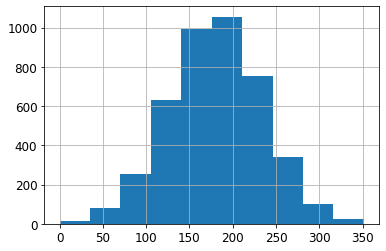

In [19]:
churn["total_day_minutes"].hist()

In [20]:
churn["day_minutes_cat"] = pd.cut(churn["total_day_minutes"],
                               bins=[-1, 75, 150, 225, 300, np.inf],
                               labels=[75, 150, 225, 300, 375])

In [21]:
churn["day_minutes_cat"].value_counts()

225    2154
150    1128
300     795
75      115
375      58
Name: day_minutes_cat, dtype: int64

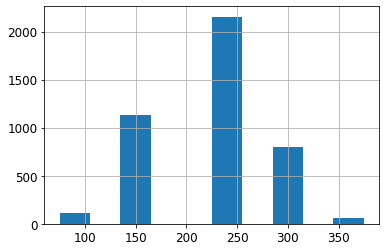

In [22]:
churn["day_minutes_cat"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(churn, churn["day_minutes_cat"]):
    strat_train_set = churn.loc[train_index]
    strat_test_set = churn.loc[test_index]

In [24]:
strat_test_set["day_minutes_cat"].value_counts() / len(strat_test_set)

225    0.507059
150    0.265882
300    0.187059
75     0.027059
375    0.012941
Name: day_minutes_cat, dtype: float64

In [25]:
churn["day_minutes_cat"].value_counts() / len(churn)

225    0.506824
150    0.265412
300    0.187059
75     0.027059
375    0.013647
Name: day_minutes_cat, dtype: float64

In [26]:
def day_minutes_cat_proportions(data):
    return data["day_minutes_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(churn, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": day_minutes_cat_proportions(churn),
    "Stratified": day_minutes_cat_proportions(strat_test_set),
    "Random": day_minutes_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [27]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
75,0.027059,0.027059,0.030588,13.043478,0.000000
150,0.265412,0.265882,0.250588,-5.585106,0.177305
225,0.506824,0.507059,0.510588,0.742804,0.046425
300,0.187059,0.187059,0.194118,3.773585,0.000000
375,0.013647,0.012941,0.014118,3.448276,-5.172414


In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("day_minutes_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [117]:
churn = strat_train_set.copy()

In [118]:
# Create a dataframe containing states and count of customer churns of those states.

state_count1=churn[['state','churn']]
state_churn=state_count1[state_count1['churn']== 'yes'].groupby('state',as_index = False).count()

state_count2=churn[['state','churn']].groupby('state',as_index = False).count()
state_count2.rename(columns={"churn":"total_cust"},inplace=True)

state_churn['total_cust']=state_count2['total_cust']
state_churn['%churn']=state_churn['churn']/state_count2['total_cust']

In [119]:
# Lets plot it using Plotly/Coropleth limiting it to USA location

# Customer Churns by State

import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_churn['state'], # Spatial coordinates
    z = state_churn['%churn'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # Set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "churn percentage",
))

fig.update_layout(
    title_text = 'Customer churns by State',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

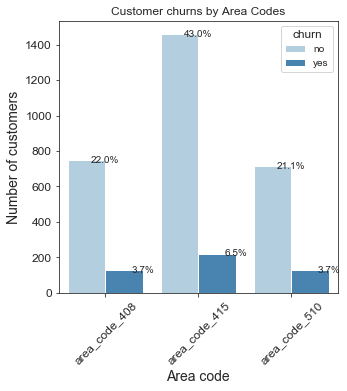

In [120]:
# Customer Churns by Area Codes

import seaborn as sns

plt.figure(figsize=(5,5))
splot=sns.countplot(data = churn,x='area_code',palette='Blues',hue = 'churn')
sns.set_style('ticks')
total = float(len(churn))
for p in splot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    splot.annotate(percentage,(x,y),ha = 'center', va = 'center')
plt.title("Customer churns by Area Codes")
plt.xlabel('Area code')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.show()

Text(3.424999999999997, 0.5, 'Number of months with operator')

<Figure size 360x360 with 0 Axes>

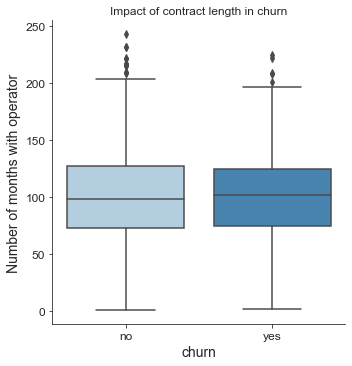

In [121]:
# Impact of contract length in churn

plt.figure(figsize=(5,5))
sns.catplot(data = churn[['account_length','churn']],x = 'churn',y = 'account_length',kind = "box", palette = 'Blues')
plt.title("Impact of contract length in churn")
plt.ylabel("Number of months with operator")

**It is not possible to see a relationship between the contract's length and customer's churn.**

Text(0.5, 6.79999999999999, 'Churn')

<Figure size 360x360 with 0 Axes>

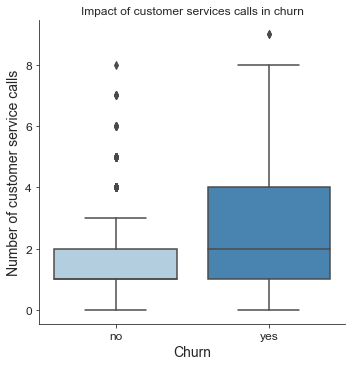

In [122]:
# Impact of customer services calls in churn

plt.figure(figsize=(5,5))
sns.catplot(data = churn[['number_customer_service_calls','churn']],x='churn',y='number_customer_service_calls',kind="box",palette='Blues')
plt.title("Impact of customer services calls in churn")
plt.ylabel("Number of customer service calls")
plt.xlabel("Churn")

**It is possible to see a relationship between customer service and customer's churn.**

Text(10.174999999999997, 0.5, 'Call charges in USD')

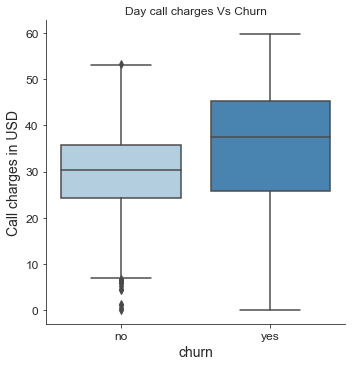

In [123]:
# Impact of day call charges calls in churn

sns.catplot(data = churn[['total_day_charge','churn']],x = 'churn',y = 'total_day_charge',kind = "box",palette = 'Blues')
plt.title("Day call charges Vs Churn")
plt.ylabel("Call charges in USD")

**It is possible to see a relationship between day call charges and customer's churn.**

Text(10.049999999999997, 0.5, 'Call charges in USD')

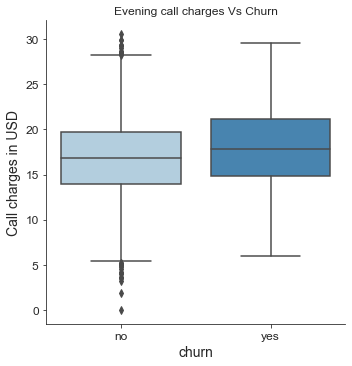

In [124]:
# Impact of evening call charges calls in churn

sns.catplot(data=churn[['total_eve_charge','churn']],x = 'churn',y = 'total_eve_charge',kind = "box",palette = 'Blues')
plt.title("Evening call charges Vs Churn")
plt.ylabel("Call charges in USD")

**It is possible to see a relationship between evening call charges and customer's churn.**

# Prepare the data for Machine Learning algorithms

In [34]:
# Converting values Yes and No to 1 and 0

churn['international_plan'] = np.where(churn['international_plan'].str.contains('yes'), 1, 0)
churn['voice_mail_plan'] = np.where(churn['voice_mail_plan'].str.contains('yes'), 1, 0)
churn['churn'] = np.where(churn['churn'].str.contains('yes'), 1, 0)

In [35]:
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2115,MS,76,area_code_408,0,0,0,173.2,93,29.44,131.2,80,11.15,170.9,104,7.69,5.4,3,1.46,0,0
1486,NJ,125,area_code_415,0,0,0,182.3,64,30.99,139.8,121,11.88,171.6,96,7.72,11.6,7,3.13,2,0
3201,IA,79,area_code_415,0,0,0,157.5,90,26.78,223.8,83,19.02,241.1,98,10.85,12.2,4,3.29,1,0
3792,ID,130,area_code_415,0,0,0,139.0,98,23.63,120.2,116,10.22,160.4,113,7.22,14.5,2,3.92,3,0
701,NC,64,area_code_510,1,1,33,127.2,93,21.62,162.9,104,13.85,247.4,109,11.13,8.1,13,2.19,0,0


In [36]:
# Remove Null values - in this case, there is none
sample_incomplete_rows = churn[churn.isnull().any(axis=1)].head()
sample_incomplete_rows

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [37]:
# Target variable y and predictors X from the dataset

X = churn.drop('churn',axis=1)
y = churn[['churn']]
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
2115,MS,76,area_code_408,0,0,0,173.2,93,29.44,131.2,80,11.15,170.9,104,7.69,5.4,3,1.46,0
1486,NJ,125,area_code_415,0,0,0,182.3,64,30.99,139.8,121,11.88,171.6,96,7.72,11.6,7,3.13,2
3201,IA,79,area_code_415,0,0,0,157.5,90,26.78,223.8,83,19.02,241.1,98,10.85,12.2,4,3.29,1
3792,ID,130,area_code_415,0,0,0,139.0,98,23.63,120.2,116,10.22,160.4,113,7.22,14.5,2,3.92,3
701,NC,64,area_code_510,1,1,33,127.2,93,21.62,162.9,104,13.85,247.4,109,11.13,8.1,13,2.19,0


In [38]:
# One hot encoding to create Dummy variables
# Note that this is a shorter/simpler version than the proposed version of ageron

X = pd.get_dummies(X,columns=['state','area_code']) # Dummyfying will create multiple extra columns
X.head() # This only shows a small fraction of all the columns

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
2115,76,0,0,0,173.2,93,29.44,131.2,80,11.15,...,0,0,0,0,0,0,0,1,0,0
1486,125,0,0,0,182.3,64,30.99,139.8,121,11.88,...,0,0,0,0,0,0,0,0,1,0
3201,79,0,0,0,157.5,90,26.78,223.8,83,19.02,...,0,0,0,0,0,0,0,0,1,0
3792,130,0,0,0,139.0,98,23.63,120.2,116,10.22,...,0,0,0,0,0,0,0,0,1,0
701,64,1,1,33,127.2,93,21.62,162.9,104,13.85,...,0,0,0,0,0,0,0,0,0,1


# Select and train a model 

In [49]:
# Splitting the data set to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

*For this exercice we cannot use a linear regression to calculate the Churn. Instead we are goin to use a Logistic regression. However, we have to deal with data imbalance first.*

**Data imbalance**

REF: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [50]:
#!pip install imblearn 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy = 0.2)
under = RandomUnderSampler(sampling_strategy = 0.6)

steps = [('o',over),('u',under)]
pipeline = Pipeline(steps = steps)

X_train, y_train = pipeline.fit_resample(X_train,y_train)

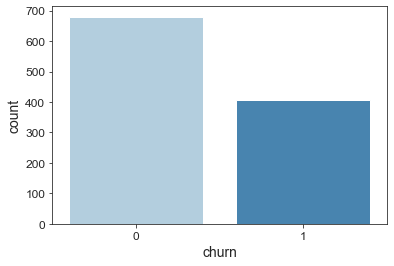

In [115]:
sns.countplot(x = 'churn', data = y_train, palette = 'Blues')

## Logistic Regression

In [57]:
# Define model
from sklearn.linear_model import LogisticRegression

# Run the model
lr = LogisticRegression(solver = 'liblinear') 
model = lr.fit(X_train,y_train['churn'])

# Calculate the accuracy score
from sklearn import metrics

y_test_pred = model.predict(X_test)
print("Accuracy without fine-tuning:", metrics.accuracy_score(y_test, y_test_pred))

# Print the confusion matrix
metrics.confusion_matrix(y_test, y_test_pred)

# Confusion matrix with label
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred, labels=[0,1]), index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))


Accuracy without fine-tuning: 0.8264705882352941
        pred:0  pred:1
true:0     776     107
true:1      70      67


## Random Forest Classifier

In [59]:
# Define model
from sklearn.ensemble import RandomForestClassifier

# Run the model
forest = RandomForestClassifier(random_state = 42)
model = forest.fit(X_train, y_train['churn']) 

# Calculate the accuracy score
y_test_pred = model.predict(X_test)
print("Accuracy without fine-tuning:", metrics.accuracy_score(y_test, y_test_pred))


Accuracy without fine-tuning: 0.9274509803921569


# Fine-tune your model 
## Grid Search for Logistic Regression

In [75]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, GridSearchCV, cross_val_score

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

# Define search space
space = dict()
space['solver'] = ['newton-cg', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Define search
search = GridSearchCV(lr, space, scoring='accuracy', n_jobs=-1, cv=cv)

# Execute search
result = search.fit(X_train, y_train['churn'])

#accuracy_score = score

# Summary: Score and Accuracy
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print("Accuracy with fine-tuning: ",result.score(X_test,y_test))

warnings.filterwarnings("ignore", category=UserWarning)

Best Score: 0.7702476077735029
Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy with fine-tuning:  0.8362745098039216


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, result.predict(X_test), target_names=['Churn = No','Churn = Yes']))

              precision    recall  f1-score   support

  Churn = No       0.92      0.88      0.90       883
 Churn = Yes       0.41      0.53      0.46       137

    accuracy                           0.84      1020
   macro avg       0.67      0.71      0.68      1020
weighted avg       0.85      0.84      0.84      1020



## Grid Search for Random Forest

In [77]:
# Define evaluation
cv = KFold(n_splits = 5, random_state = 42, shuffle = True)

# Define search space
n_estimators = [200, 300, 500]
max_depth = [10, 15, 20]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

search = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)


# Execute search
result = search.fit(X_train, y_train['churn'])

# Summary: Score and Accuracy
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print("Accuracy with fine-tuning:", result.score(X_test, y_test))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Score: 0.8805052027051022
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with fine-tuning: 0.9303921568627451


In [78]:
print(classification_report(y_test, result.predict(X_test), target_names=['Churn = No','Churn = Yes']))

              precision    recall  f1-score   support

  Churn = No       0.97      0.95      0.96       883
 Churn = Yes       0.71      0.80      0.76       137

    accuracy                           0.93      1020
   macro avg       0.84      0.88      0.86      1020
weighted avg       0.93      0.93      0.93      1020



# Extra material

## XGBoost

In [103]:
# !pip install xgboost
import xgboost as xgb

xgb = xgb.XGBClassifier( 
        n_estimators = 3000,
        max_depth = 15, 
        learning_rate = 0.05, 
        subsample = 1,
        colsample_bytree = 0.5, 
        missing = -1, 
        eval_metric = 'auc')


In [104]:
result = xgb.fit(X_train, y_train, 
        eval_set=[(X_train, y_train)],
        verbose=50, early_stopping_rounds=100)

[0]	validation_0-auc:0.876058
Will train until validation_0-auc hasn't improved in 100 rounds.
[50]	validation_0-auc:1
[100]	validation_0-auc:1
Stopping. Best iteration:
[49]	validation_0-auc:1



In [106]:
print(classification_report(y_test, result.predict(X_test), target_names=['Churn = No','Churn = Yes']))

              precision    recall  f1-score   support

  Churn = No       0.96      0.96      0.96       883
 Churn = Yes       0.76      0.76      0.76       137

    accuracy                           0.94      1020
   macro avg       0.86      0.86      0.86      1020
weighted avg       0.94      0.94      0.94      1020



# References

[1]`https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb`
[2]`https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/`
[3]`https://www.kaggle.com/sabyasachi10/telecom-customer-churn-smote-and-xgboost`
